In [ ]:
https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

In [15]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd

In [16]:
# read train datasets
titanic = pd.read_csv('titanic.csv')

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [19]:
#Age is an important feature. We need to get the median and assign to the null value
#inPlace=True is to commit the changes
titanic.Age.fillna(np.mean(titanic.Age),inplace=True)
titanic.Embarked.fillna('S', inplace=True)

In [20]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [22]:
# Change to categoric column to numeric -OneHot Encoding
titanic = pd.get_dummies(data=titanic,columns=['Sex','Embarked'], drop_first=True)

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [24]:
#Drop unnecessary columns
drop_elements = ['Name','Ticket','Cabin']
titanic = titanic.drop(drop_elements, axis=1)

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


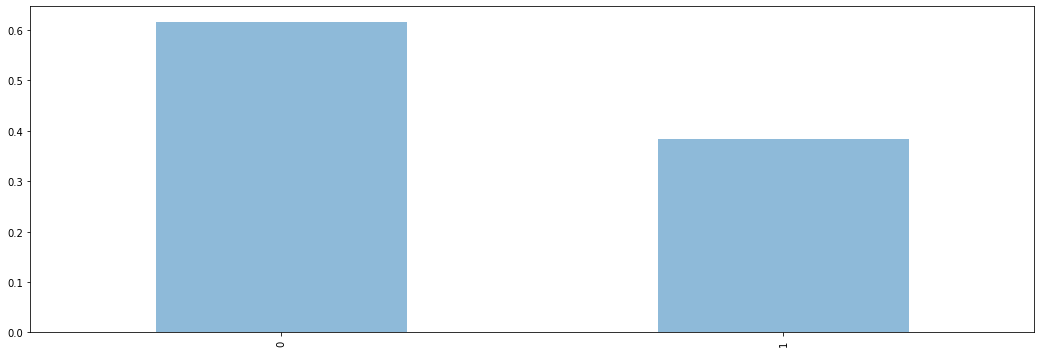

In [27]:
# how many people survived 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,6))
titanic.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()
#shows 40% survived 60% not survived

In [31]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# read train datasets
walmart = pd.read_csv('wallmart.txt',sep='\t')

In [33]:
x=walmart.iloc[0:,1:]


In [34]:
x.head()

,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty&Claims,Packaging,Order&Billing,Price_Flexibility,Delivery_Speed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,3.6,4.3,4.1,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,4.5,3.5,3.5


In [35]:
#standardize data
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

standardScaler.fit(x)

x_std=standardScaler.transform(x)

In [36]:
from sklearn.decomposition import PCA

#reduce the dimension from 13 to 4  --> 13 features are brought down to 4 factors 
pcaModel=PCA(n_components=13)

pcaModel.fit(x_std)

pcaModel.explained_variance_

array([3.85460215, 2.68846054, 1.73021706, 1.55157641, 0.97404858,
       0.57776504, 0.49165158, 0.42352213, 0.28974684, 0.19103405,
       0.15551242, 0.12837905, 0.00881078])

In [37]:
import numpy as np
cumVar=np.cumsum(pcaModel.explained_variance_)


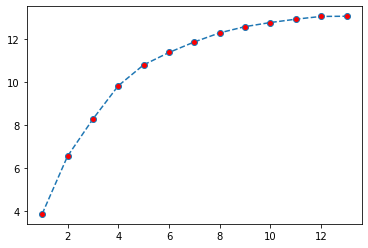

In [38]:
from matplotlib import pyplot as plt

plt.plot(range(1,14), cumVar, marker='o', linestyle='dashed',markerfacecolor='red')

In [39]:
pcaModel=PCA(n_components=5)

pcaModel.fit(x_std)

components=pcaModel.transform(x_std)

pd.DataFrame(components).to_csv("cmp.csv", index=None)